In [100]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import numpy as np
import requests
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [101]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [102]:



API_KEY = "8edf5a3557214b83a8d24412250109"
local = "Curitiba"  # pode ser "Curitiba, Brazil" ou latitude,longitude
url = "http://api.weatherapi.com/v1/forecast.json"
params = {
    "key": API_KEY,
    "q": local,
    "lang": "pt",     # opcional: traduz descrições para português
    "aqi": "no"       # opcional: inclui dados de qualidade do ar
}

try:
    response = requests.get(url, params=params)
    response.raise_for_status()
    dados = response.json()
    
    # Exemplo de como acessar alguns dados:
    # temperatura = dados["current"]["temp_c"]
    # descricao = dados["current"]["condition"]["text"]
    # umidade = dados["current"]["humidity"]
    # vento = dados["current"]["wind_kph"]

    # print(f"Tempo em {dados['location']['name']}: {descricao.capitalize()}")
    # print(f"Temperatura: {temperatura} °C")
    # print(f"Umidade: {umidade}%")
    # print(f"Vento: {vento} km/h")
   # print(dados)

except requests.exceptions.HTTPError as err:
    print(f"Erro HTTP: {err} — código: {response.status_code}")
except ValueError:
    print("Erro ao decodificar JSON.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

df = pd.json_normalize(dados)
df

    


,location.name,location.region,location.country,location.lat,location.lon,location.tz_id,location.localtime_epoch,location.localtime,current.last_updated_epoch,current.last_updated,current.temp_c,current.temp_f,current.is_day,current.condition.text,current.condition.icon,current.condition.code,current.wind_mph,current.wind_kph,current.wind_degree,current.wind_dir,current.pressure_mb,current.pressure_in,current.precip_mm,current.precip_in,current.humidity,current.cloud,current.feelslike_c,current.feelslike_f,current.windchill_c,current.windchill_f,current.heatindex_c,current.heatindex_f,current.dewpoint_c,current.dewpoint_f,current.vis_km,current.vis_miles,current.uv,current.gust_mph,current.gust_kph,current.short_rad,current.diff_rad,current.dni,current.gti,forecast.forecastday
0,Curitiba,Parana,Brazil,-25.4167,-49.25,America/Sao_Paulo,1757475418,2025-09-10 00:36,1757475000,2025-09-10 00:30,13.1,55.6,0,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000,3.6,5.8,224,SW,1022.0,30.18,0.0,0.0,77,0,13.1,55.6,10.1,50.2,10.5,50.9,7.9,46.3,10.0,6.0,0.0,6.5,10.5,0,0,0,0,"[{'date': '2025-09-10', 'date_epoch': 17574624..."


In [103]:
forecast_list = dados["forecast"]["forecastday"]
df_forecast = pd.json_normalize(forecast_list)
df_forecast


,date,date_epoch,hour,day.maxtemp_c,day.maxtemp_f,day.mintemp_c,day.mintemp_f,day.avgtemp_c,day.avgtemp_f,day.maxwind_mph,day.maxwind_kph,day.totalprecip_mm,day.totalprecip_in,day.totalsnow_cm,day.avgvis_km,day.avgvis_miles,day.avghumidity,day.daily_will_it_rain,day.daily_chance_of_rain,day.daily_will_it_snow,day.daily_chance_of_snow,day.condition.text,day.condition.icon,day.condition.code,day.uv,astro.sunrise,astro.sunset,astro.moonrise,astro.moonset,astro.moon_phase,astro.moon_illumination,astro.is_moon_up,astro.is_sun_up
0,2025-09-10,1757462400,"[{'time_epoch': 1757473200, 'time': '2025-09-1...",26.7,80.1,8.8,47.9,16.3,61.4,7.2,11.5,0.0,0.0,0.0,10.0,6.0,59,0,0,0,0,Sol,//cdn.weatherapi.com/weather/64x64/day/113.png,1000,2.2,06:19 AM,06:09 PM,09:24 PM,07:59 AM,Waning Gibbous,93,1,0


In [104]:
hour_list = dados["forecast"]["forecastday"][0]["hour"]
df_hour = pd.json_normalize(hour_list)
df_hour


,time_epoch,time,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,precip_mm,precip_in,snow_cm,humidity,cloud,feelslike_c,feelslike_f,windchill_c,windchill_f,heatindex_c,heatindex_f,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,short_rad,diff_rad,dni,gti,condition.text,condition.icon,condition.code
0,1757473200,2025-09-10 00:00,11.3,52.4,0,3.8,6.1,225,SW,1020.0,30.12,0.0,0.0,0.0,80,0,11.0,51.7,11.0,51.7,11.3,52.4,8.0,46.5,0,0,0,0,10.0,6.0,6.8,10.9,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
1,1757476800,2025-09-10 01:00,13.1,55.6,0,3.6,5.8,224,SW,1022.0,30.18,0.0,0.0,0.0,77,0,10.1,50.2,10.1,50.2,10.5,50.9,7.9,46.3,0,0,0,0,10.0,6.0,6.5,10.5,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
2,1757480400,2025-09-10 02:00,9.9,49.9,0,3.1,5.0,232,SW,1020.0,30.12,0.0,0.0,0.0,87,7,9.7,49.4,9.7,49.4,9.9,49.9,7.9,46.1,0,0,0,0,10.0,6.0,5.8,9.3,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
3,1757484000,2025-09-10 03:00,9.5,49.0,0,2.5,4.0,252,WSW,1020.0,30.12,0.0,0.0,0.0,88,11,9.5,49.1,9.5,49.1,9.5,49.0,7.6,45.7,0,0,0,0,10.0,6.0,4.8,7.7,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
4,1757487600,2025-09-10 04:00,9.2,48.5,0,2.0,3.2,269,W,1020.0,30.13,0.0,0.0,0.0,88,10,9.5,49.0,9.5,49.0,9.2,48.5,7.4,45.2,0,0,0,0,10.0,6.0,4.1,6.6,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
5,1757491200,2025-09-10 05:00,8.8,47.9,0,1.8,2.9,270,W,1021.0,30.15,0.0,0.0,0.0,87,4,8.8,47.9,8.8,47.9,8.8,47.9,6.8,44.2,0,0,0,0,10.0,6.0,3.8,6.0,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
6,1757494800,2025-09-10 06:00,9.8,49.6,0,1.3,2.2,212,SSW,1021.0,30.16,0.0,0.0,0.0,79,0,9.8,49.6,9.8,49.6,9.8,49.6,6.4,43.5,0,0,0,0,10.0,6.0,2.7,4.3,0.0,0.00,0.00,0.00,0.00,Céu limpo,//cdn.weatherapi.com/weather/64x64/night/113.png,1000
7,1757498400,2025-09-10 07:00,13.4,56.1,1,1.3,2.2,192,SSW,1021.0,30.16,0.0,0.0,0.0,59,0,13.4,56.1,13.4,56.1,13.4,56.1,5.5,41.8,0,0,0,0,10.0,6.0,1.7,2.7,0.2,6.77,2.48,6.00,5.19,Sol,//cdn.weatherapi.com/weather/64x64/day/113.png,1000
8,1757502000,2025-09-10 08:00,16.8,62.3,1,1.3,2.2,154,SSE,1021.0,30.16,0.0,0.0,0.0,41,0,16.8,62.3,16.8,62.3,16.8,62.3,3.4,38.2,0,0,0,0,10.0,6.0,1.5,2.5,1.2,51.71,11.08,49.66,37.51,Sol,//cdn.weatherapi.com/weather/64x64/day/113.png,1000
9,1757505600,2025-09-10 09:00,20.0,68.0,1,0.7,1.1,130,SE,1021.0,30.15,0.0,0.0,0.0,29,0,20.0,68.0,20.0,68.0,20.0,68.0,1.3,34.3,0,0,0,0,10.0,6.0,0.8,1.3,3.2,122.34,19.54,119.11,86.99,Sol,//cdn.weatherapi.com/weather/64x64/day/113.png,1000


In [105]:
# Lista apenas com as colunas importantes
colunas_importantes = [
    "time",
    "feelslike_c",
    "humidity",
    "cloud",
    "uv",
    "wind_kph",
    "will_it_rain",
    "chance_of_rain",
]

df_limpo = df_hour[colunas_importantes]
df_limpo.sample(5)

,time,feelslike_c,humidity,cloud,uv,wind_kph,will_it_rain,chance_of_rain
10,2025-09-10 10:00,22.6,21,0,5.8,0.4,0,0
18,2025-09-10 18:00,15.5,74,0,0.0,10.8,0,0
12,2025-09-10 12:00,24.6,15,0,9.5,1.4,0,0
1,2025-09-10 01:00,10.1,77,0,0.0,5.8,0,0
13,2025-09-10 13:00,25.0,14,0,9.1,2.5,0,0


In [106]:
#dados de temperatura
x = df_limpo[['time', "feelslike_c", "humidity", "cloud", "uv", "wind_kph"]].values 

#chances de chuva 
y = df_limpo[['chance_of_rain', 'will_it_rain']].values 

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
x_train = np.random.rand(16, 6)
y_train = np.random.rand(16)


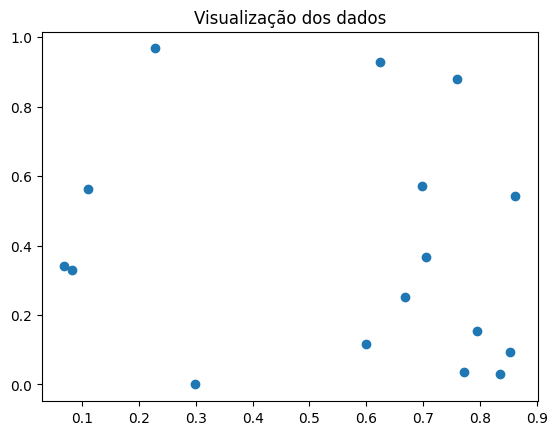

In [113]:
 
#visualizando os dados
fig, ax = plt.subplots()
ax.scatter(x_train[:, 0], y_train)
ax.set_title('Visualização dos dados')
plt.show()